In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [4]:
train_df=pd.read_csv("/kaggle/input/ai-vs-human-generated-dataset/train.csv")

In [5]:
train_df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
train_df

,file_name,label
0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1
1,train_data/041be3153810433ab146bc97d5af505c.jpg,0
2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1
3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0
4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1
...,...,...
79945,train_data/9283b107f6274279b6f15bbe77c523aa.jpg,0
79946,train_data/4c6b17fe6dd743428a45773135a10508.jpg,1
79947,train_data/1ccbf96d04e342fd9f629ad55466b29e.jpg,0
79948,train_data/ff960b55f296445abb3c5f304b52e104.jpg,1


In [7]:
train_df["file_name"] = "/kaggle/input/ai-vs-human-generated-dataset/" + train_df["file_name"]

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

# Load your dataset (assuming train_df contains 'file_name' and 'label' columns)
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42, shuffle=True)

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE  # Optimize data loading

# Function to load and preprocess images
def load_and_preprocess_image(file_path, label):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Assuming JPEG images
    image = tf.image.resize(image, IMG_SIZE) / 255.0  # Normalize pixels
    return image, label

# Convert DataFrame to TensorFlow dataset
def create_tf_dataset(dataframe, shuffle_buffer=1000):
    file_paths = dataframe['file_name'].values
    labels = dataframe['label'].values.astype(np.float32)

    dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(shuffle_buffer).batch(BATCH_SIZE).prefetch(AUTOTUNE)
    
    return dataset

# Create training and validation datasets
train_dataset = create_tf_dataset(train_data)
val_dataset = create_tf_dataset(val_data, shuffle_buffer=500)



In [7]:
base_model = tf.keras.applications.DenseNet121(
    weights='imagenet', include_top=False, input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze base model

# Define the model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 280s 248ms/step - accuracy: 0.7493 - loss: 0.4812 - val_accuracy: 0.9024 - val_loss: 0.2312
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 227s 225ms/step - accuracy: 0.8990 - loss: 0.2468 - val_accuracy: 0.9206 - val_loss: 0.1918
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 227s 226ms/step - accuracy: 0.9142 - loss: 0.2056 - val_accuracy: 0.9291 - val_loss: 0.1712
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 229s 227ms/step - accuracy: 0.9283 - loss: 0.1791 - val_accuracy: 0.9341 - val_loss: 0.1619
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 229s 227ms/step - accuracy: 0.9350 - loss: 0.1603 - val_accuracy: 0.9390 - val_loss: 0.1535
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 229s 228ms/step - accuracy: 0.9410 - loss: 0.1476 - val_accuracy: 0.9412 - val_loss: 0.1470
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 229s 228ms/step - accuracy: 0.9456 - loss: 0.1339 - val_accuracy: 0.9427 - val_loss: 0.1436
Epoch 8/10


In [8]:
#### finetune####
base_model.trainable = True
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=10)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1069s 880ms/step - accuracy: 0.9602 - loss: 0.1097 - val_accuracy: 0.9879 - val_loss: 0.0345
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 750s 749ms/step - accuracy: 0.9920 - loss: 0.0219 - val_accuracy: 0.9916 - val_loss: 0.0254
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 749s 748ms/step - accuracy: 0.9962 - loss: 0.0108 - val_accuracy: 0.9937 - val_loss: 0.0233
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 745s 743ms/step - accuracy: 0.9984 - loss: 0.0054 - val_accuracy: 0.9936 - val_loss: 0.0244
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 750s 749ms/step - accuracy: 0.9987 - loss: 0.0046 - val_accuracy: 0.9946 - val_loss: 0.0220
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 748s 747ms/step - accuracy: 0.9983 - loss: 0.0056 - val_accuracy: 0.9949 - val_loss: 0.0219
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 749s 748ms/step - accuracy: 0.9995 - loss: 0.0017 - val_accuracy: 0.9949 - val_loss: 0.0219
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 750s 749ms/step - a

In [9]:
#### function to display a test photo and its predicted label ####
# Load test CSV
test_df = pd.read_csv("/kaggle/input/ai-vs-human-generated-dataset/test.csv")
test_df2 = pd.read_csv("/kaggle/input/ai-vs-human-generated-dataset/test.csv")
# Add full path to test images
test_df["id"] = "/kaggle/input/ai-vs-human-generated-dataset/" + test_df["id"]

# Function to preprocess test images
def load_test_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Decode JPG
    image = tf.image.resize(image, IMG_SIZE) / 255.0  # Resize and normalize
    return image

# Convert test DataFrame into a TensorFlow dataset
test_paths = test_df["id"].values
test_dataset = tf.data.Dataset.from_tensor_slices(test_paths)
test_dataset = test_dataset.map(lambda x: (load_test_image(x)), num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(AUTOTUNE)


In [10]:
# Make predictions on test data
predictions = model.predict(test_dataset)

# Convert probabilities to binary labels (0 or 1)
test_df["label"] = (predictions > 0.5).astype(int)


87/87 ━━━━━━━━━━━━━━━━━━━━ 83s 838ms/step


In [11]:
#### evaluation using f1score####
from sklearn.metrics import f1_score

# Get true labels from validation dataset
y_true = np.concatenate([y.numpy() for _, y in val_dataset])
y_pred_probs = model.predict(val_dataset)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate F1 Score
f1 = f1_score(y_true, y_pred)
print(f"F1 Score on Validation Set: {f1:.4f}")


250/250 ━━━━━━━━━━━━━━━━━━━━ 63s 217ms/step
F1 Score on Validation Set: 0.4990


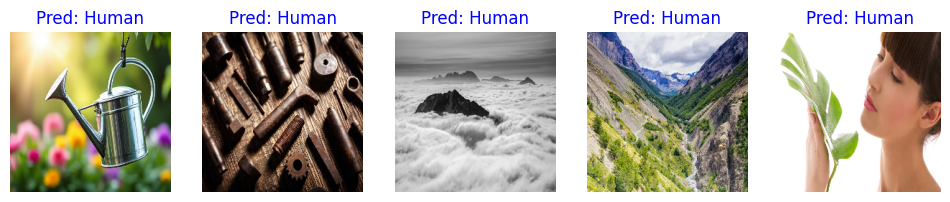

In [12]:
import matplotlib.pyplot as plt

# Function to display predictions on test images
def show_test_predictions(dataset, predictions, num_samples=5):
    plt.figure(figsize=(12, num_samples * 2))
    
    for i, image in enumerate(dataset.unbatch().take(num_samples)):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image.numpy())  # Convert tensor to numpy for display
        plt.axis("off")
        
        # Get predicted label
        pred_label = "AI-Generated" if predictions[i] == 1 else "Human"
        
        # Show label
        plt.title(f"Pred: {pred_label}", color="blue")

    plt.show()

# Show 5 test images with predicted labels
show_test_predictions(test_dataset, test_df["label"].values, num_samples=5)


In [14]:
#### Submission ####
# Create submission DataFrame
submission_df = pd.DataFrame({
    "id": test_df2["id"],  # Unique ID starting from 1
    "label": test_df["label"]  # Predicted labels
})

# Save submission file
submission_df.to_csv("/kaggle/working/densesubmit.csv", index=False)
print("Submission file saved: submission.csv")


Submission file saved: submission.csv


In [ ]:
### MobileNet ###
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import MobileNetV2
import tensorflow as tf

# Create the custom model
from tensorflow.keras.layers import MaxPooling2D, Conv2D,Dense,Dropout,Flatten
base_model1 = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
base_model1.trainable = False  # Freeze the base model
model1 = Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  
    tf.keras.layers.BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  
    tf.keras.layers.BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])
# Compile the model
model1.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001, weight_decay=1e-4), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history1 = model1.fit(train_dataset, validation_data=val_dataset, epochs=10)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model


# Step 2: Unfreeze the base model (MobileNetV2)
base_model1 = model1.layers[0]  # MobileNetV2 is the first layer in your model
base_model1.trainable = True   # Unfreeze all layers of MobileNetV2

# Step 3: Recompile with a lower learning rate (for stable fine-tuning)
model1.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-5, weight_decay=1e-4),  # Reduce LR
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 4: Fine-tune the model
history_finetune1 = model1.fit(
    train_dataset,
    epochs=20,  # Adjust based on performance
    validation_data=val_dataset
)


## exception

In [22]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization,Dropout
from tensorflow.keras.models import Model

# Load pre-trained Xception model (without the top classification layer)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model (optional for fine-tuning)
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)  # Add batch normalization
x = Dropout(0.5)(x) 
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)  # Add batch normalization
x = Dropout(0.5)(x) 
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)  # Add batch normalization
x = Dropout(0.5)(x) 
predictions = Dense(2, activation='softmax')(x)  # Output layer

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [23]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Adam optimizer
    loss='sparse_categorical_crossentropy',  # Binary cross-entropy loss
    metrics=['accuracy']  # Accuracy as the evaluation metric
)


In [24]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [25]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10 , # Number of epochs
    callbacks = [lr_scheduler,early_stopping]
)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 470s 430ms/step - accuracy: 0.5984 - loss: 1.0108 - val_accuracy: 0.7939 - val_loss: 0.4416 - learning_rate: 1.0000e-04
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 393s 392ms/step - accuracy: 0.7391 - loss: 0.6007 - val_accuracy: 0.8275 - val_loss: 0.3820 - learning_rate: 1.0000e-04
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 392s 391ms/step - accuracy: 0.7819 - loss: 0.4877 - val_accuracy: 0.8427 - val_loss: 0.3590 - learning_rate: 1.0000e-04
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 393s 391ms/step - accuracy: 0.8071 - loss: 0.4231 - val_accuracy: 0.8500 - val_loss: 0.3448 - learning_rate: 1.0000e-04
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 392s 391ms/step - accuracy: 0.8261 - loss: 0.3892 - val_accuracy: 0.8537 - val_loss: 0.3334 - learning_rate: 1.0000e-04
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 392s 391ms/step - accuracy: 0.8400 - loss: 0.3621 - val_accuracy: 0.8582 - val_loss: 0.3251 - learning_rate: 1.0000e-04
Epoch 7/10
1000/1000 ━━━━━━━

In [26]:
model.save("exceptiom_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [27]:
base_model.trainable = True

# Recompile with a lower learning rate to prevent destroying pre-trained weights
model.compile(
    optimizer=Adam(learning_rate=0.00001),  # Adam optimizer
    loss='sparse_categorical_crossentropy',  # Binary cross-entropy loss
    metrics=['accuracy']  # Accuracy as the evaluation metric
)

history_finetune = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10 , # Number of epochs
    callbacks = [lr_scheduler,early_stopping]
)
# Save in HDF5 format
model.save("finetune_exception.h5")

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1328s 1s/step - accuracy: 0.8998 - loss: 0.2448 - val_accuracy: 0.9721 - val_loss: 0.0835 - learning_rate: 1.0000e-05
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1216s 1s/step - accuracy: 0.9752 - loss: 0.0804 - val_accuracy: 0.9854 - val_loss: 0.0440 - learning_rate: 1.0000e-05
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1216s 1s/step - accuracy: 0.9880 - loss: 0.0412 - val_accuracy: 0.9896 - val_loss: 0.0308 - learning_rate: 1.0000e-05
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1216s 1s/step - accuracy: 0.9917 - loss: 0.0271 - val_accuracy: 0.9913 - val_loss: 0.0250 - learning_rate: 1.0000e-05
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1216s 1s/step - accuracy: 0.9956 - loss: 0.0171 - val_accuracy: 0.9924 - val_loss: 0.0222 - learning_rate: 1.0000e-05
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1216s 1s/step - accuracy: 0.9972 - loss: 0.0116 - val_accuracy: 0.9935 - val_loss: 0.0215 - learning_rate: 1.0000e-05
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
xception=load_model("/kaggle/input/aivsreal/keras/default/1/exceptiom_model.h5")
xceptionfinetuned=load_model("/kaggle/input/aivsreal/keras/default/1/finetune_exception.h5")

In [11]:
#### function to display a test photo and its predicted label ####
# Load test CSV
test_df = pd.read_csv("/kaggle/input/ai-vs-human-generated-dataset/test.csv")
test_df2 = pd.read_csv("/kaggle/input/ai-vs-human-generated-dataset/test.csv")
# Add full path to test images
test_df["id"] = "/kaggle/input/ai-vs-human-generated-dataset/" + test_df["id"]

# Function to preprocess test images
def load_test_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Decode JPG
    image = tf.image.resize(image, IMG_SIZE) / 255.0  # Resize and normalize
    return image

# Convert test DataFrame into a TensorFlow dataset
test_paths = test_df["id"].values
test_dataset = tf.data.Dataset.from_tensor_slices(test_paths)
test_dataset = test_dataset.map(lambda x: (load_test_image(x)), num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(AUTOTUNE)


In [18]:
# Make predictions on test data
predictions = xceptionfinetuned.predict(test_dataset)

# Convert probabilities to binary labels (0 or 1)
test_df["label"] = np.argmax(predictions, axis=1)
# Make predictions on test data



87/87 ━━━━━━━━━━━━━━━━━━━━ 44s 467ms/step


In [19]:
#### evaluation using f1score##

from sklearn.metrics import f1_score

# Get true labels from the validation dataset
y_true = np.concatenate([y.numpy() for _, y in val_dataset])

# Get predicted probabilities from the model
y_pred_probs = xceptionfinetuned.predict(val_dataset)

y_pred = np.argmax(y_pred_probs, axis=1)

# Compute F1 Score
f1 = f1_score(y_true, y_pred, average="macro")  # Use "macro" for class balance
print(f"F1 Score on Validation Set: {f1:.4f}")


250/250 ━━━━━━━━━━━━━━━━━━━━ 72s 277ms/step
F1 Score on Validation Set: 0.4982


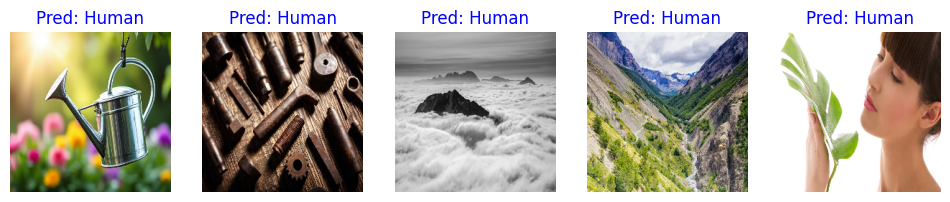

In [20]:
import matplotlib.pyplot as plt

# Function to display predictions on test images
def show_test_predictions(dataset, predictions, num_samples=5):
    plt.figure(figsize=(12, num_samples * 2))
    
    for i, image in enumerate(dataset.unbatch().take(num_samples)):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image.numpy())  # Convert tensor to numpy for display
        plt.axis("off")
        
        # Get predicted label
        pred_label = "AI-Generated" if predictions[i] == 1 else "Human"
        
        # Show label
        plt.title(f"Pred: {pred_label}", color="blue")

    plt.show()

# Show 5 test images with predicted labels
show_test_predictions(test_dataset, test_df["label"].values, num_samples=5)


In [21]:
#### Submission ####
# Create submission DataFrame
submission_df = pd.DataFrame({
    "id": test_df2["id"],  # Unique ID starting from 1
    "label": test_df["label"]  # Predicted labels
})

# Save submission file
submission_df.to_csv("/kaggle/working/xceptionftsubmit.csv", index=False)
print("Submission file saved: submission.csv")


Submission file saved: submission.csv


In [24]:
import random
import matplotlib.pyplot as plt

def show_sample_prediction(dataset, y_true, y_pred, class_names=["Human", "AI-Generated"]):
    """
    Displays a random sample from the dataset with its true and predicted labels.
    
    Args:
    - dataset: TensorFlow dataset (e.g., validation dataset)
    - y_true: True labels as a NumPy array
    - y_pred: Predicted labels as a NumPy array
    - class_names: List of class names (default: ["Human", "AI-Generated"])
    """
    # Choose a random index
    index = random.randint(0, len(y_true) - 1)
    
    # Extract image correctly from the dataset
    dataset_unbatched = dataset.unbatch()
    sample = list(dataset_unbatched.take(index + 1))[-1]  # Get the (image, label) tuple
    
    image, _ = sample  # Extract image, ignore label
    image = image.numpy()  # Convert tensor to numpy

    # Get labels
    true_label = class_names[int(y_true[index])]
    pred_label = class_names[int(y_pred[index])]

    # Plot image with labels
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"True: {true_label} | Pred: {pred_label}", color="green" if true_label == pred_label else "red")
    plt.show()


## New architectures

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [2]:
# Set paths for training & test images
TRAIN_CSV = "/kaggle/input/ai-vs-human-generated-dataset/train.csv"
TEST_CSV = "/kaggle/input/ai-vs-human-generated-dataset/test.csv"
TRAIN_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"
TEST_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"

# Load CSV files
train_df = pd.read_csv(TRAIN_CSV)
#test_df = pd.read_csv(TEST_CSV)

# Add full image paths
train_df["file_name"] = TRAIN_DIR + train_df["file_name"]
#test_df["file_name"] = TEST_DIR + test_df["file_name"]

# Split into training & validation sets
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)


In [11]:
print(train_data["file_name"].head())  # Show first 5 paths


2530     /kaggle/input/ai-vs-human-generated-dataset/tr...
11128    /kaggle/input/ai-vs-human-generated-dataset/tr...
70752    /kaggle/input/ai-vs-human-generated-dataset/tr...
44211    /kaggle/input/ai-vs-human-generated-dataset/tr...
75666    /kaggle/input/ai-vs-human-generated-dataset/tr...
Name: file_name, dtype: object


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale for validation

# Ensure labels are strings
train_data["label"] = train_data["label"].astype(str)
val_data["label"] = val_data["label"].astype(str)

# Load images
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col="file_name",
    y_col="label",
    target_size=(224, 224),
    batch_size=64,
    class_mode="binary",
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col="file_name",
    y_col="label",
    target_size=(224, 224),
    batch_size=64,
    class_mode="binary",
    shuffle=False
)


Found 63960 validated image filenames belonging to 2 classes.
Found 15990 validated image filenames belonging to 2 classes.


## EFNET GAN

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB3
import cv2
import numpy as np

# Load EfficientNet as a feature extractor
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model
# Define GAN Fingerprint Layer (Frequency Features)
class GANFingerprint(layers.Layer):
    def __init__(self, **kwargs):
        super(GANFingerprint, self).__init__(**kwargs)

    def call(self, inputs):
        # Convert image to grayscale for better frequency analysis
        gray = tf.image.rgb_to_grayscale(inputs)
        
        # Apply Discrete Fourier Transform (DFT) for frequency analysis
        fft = tf.signal.fft2d(tf.cast(gray, tf.complex64))  
        fft_abs = tf.abs(fft)  # Get magnitude spectrum
        
        # Reduce dimensions to match CNN output
        fft_abs = tf.image.resize(fft_abs, (7, 7))  # Resize to match EfficientNet output size
        fft_abs = tf.squeeze(fft_abs, axis=-1)  # Remove extra channel
        
        return fft_abs

# Build the model
def create_advanced_model():
    inputs = layers.Input(shape=(224, 224, 3))
    
    # Feature extraction from CNN
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)

    # GAN Fingerprint Detection
    x_freq = GANFingerprint()(inputs)  # Extract frequency domain info
    x_freq = layers.Flatten()(x_freq)  # Flatten to match dimensions

    # Ensure shapes match before concatenation
    x = layers.Dense(128, activation='relu')(x)  # Reduce dimensions to match frequency feature size
    x_freq = layers.Dense(128, activation='relu')(x_freq)

    # Combine CNN & Frequency Features
    x = layers.Concatenate()([x, x_freq])

    # Fully Connected Layers
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)  # Ensure this is correctly assigned

    model = models.Model(inputs, outputs)
    
    # Compile Model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Create model
model = create_advanced_model()
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ efficientnetb3            │ (None, 7, 7, 1536)     │     10,783,535 │ input_layer_3[0][0]    │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gan_fingerprint_1         │ (None, 7, 7)           │              0 │ input_layer_3[0][0]    │
│ (GANFingerprint)          │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 1536)           │              0 │ efficientnetb3[0][0]   │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 49)             │              0 │ gan_fingerprint_1[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │        196,736 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 128)            │          6,400 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 256)            │              0 │ dense_3[0][0],         │
│ (Concatenate)             │                        │                │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 512)            │        131,584 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 512)            │              0 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 256)            │        131,328 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 256)            │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │            257 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 11,249,840 (42.91 MB)

 Trainable params: 466,305 (1.78 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

In [6]:
historyadvanced = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1364s 1s/step - accuracy: 0.7343 - loss: 0.5366 - val_accuracy: 0.7494 - val_loss: 0.5075
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 941s 935ms/step - accuracy: 0.7537 - loss: 0.5109 - val_accuracy: 0.7270 - val_loss: 0.5542
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 939s 933ms/step - accuracy: 0.7579 - loss: 0.5114 - val_accuracy: 0.7515 - val_loss: 0.5083
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 937s 931ms/step - accuracy: 0.7614 - loss: 0.5030 - val_accuracy: 0.7672 - val_loss: 0.4918
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 939s 933ms/step - accuracy: 0.7631 - loss: 0.4976 - val_accuracy: 0.7356 - val_loss: 0.5232
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 924s 917ms/step - accuracy: 0.7633 - loss: 0.5012 - val_accuracy: 0.7403 - val_loss: 0.5231
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 916s 910ms/step - accuracy: 0.7628 - loss: 0.4984 - val_accuracy: 0.7420 - val_loss: 0.5256
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 918s 913ms/step - accuracy: 0.764

In [10]:
model.save("enetimproved.h5")

In [11]:
# Set paths for training & test images
#TRAIN_CSV = "/kaggle/input/ai-vs-human-generated-dataset/train.csv"
TEST_CSV = "/kaggle/input/ai-vs-human-generated-dataset/test.csv"
#TRAIN_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"
TEST_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"

test_df = pd.read_csv(TEST_CSV)
test_df2 = pd.read_csv(TEST_CSV)
test_df["id"] = TEST_DIR + test_df["id"]


In [12]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,  # Ensure test_df has "file_name"
    x_col="id",
    target_size=(224, 224),
    batch_size=64,
    class_mode=None,  # No labels in test data
    shuffle=False  # Do not shuffle for correct ID mapping
)

Found 5540 validated image filenames.


In [13]:
# Predict probabilities (sigmoid output)
predictions = model.predict(test_generator)

# Convert probabilities to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step


In [14]:
# Create submission DataFrame
submission_df = pd.DataFrame({
    "id": test_df2["id"],  # Ensure this column exists in test data
    "label": predicted_labels
})

# Save submission file
submission_file = "/kaggle/working/improvedEFNETsubmit.csv"
submission_df.to_csv(submission_file, index=False)

print(f"Submission file saved: {submission_file}")

Submission file saved: /kaggle/working/improvedEFNETsubmit.csv


In [4]:
import os

# Check if at least one image exists
missing_files = [f for f in train_data["file_name"] if not os.path.exists(f)]

print(f"Total missing files: {len(missing_files)}")
print("Example missing files:", missing_files[:5])


Total missing files: 0
Example missing files: []


In [16]:
class_weights = compute_class_weight("balanced", classes=np.unique(train_df["label"]), y=train_df["label"])
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class Weights:", class_weights_dict)


Class Weights: {0: 1.0, 1: 1.0}


In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0

# Load EfficientNetB0 as the base model
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Create the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
import tensorflow.keras.backend as K

def f1_m(y_true, y_pred):
    precision = K.sum(K.round(y_true * y_pred)) / (K.sum(K.round(y_pred)) + K.epsilon())
    recall = K.sum(K.round(y_true * y_pred)) / (K.sum(K.round(y_true)) + K.epsilon())
    return 2 * (precision * recall) / (precision + recall + K.epsilon())

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=["accuracy", f1_m])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1224s 1s/step - accuracy: 0.5018 - f1_m: 29.6735 - loss: 0.6933 - val_accuracy: 0.6201 - val_f1_m: 13.0124 - val_loss: 0.6908
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 909s 903ms/step - accuracy: 0.5239 - f1_m: 29.2076 - loss: 0.6918 - val_accuracy: 0.5000 - val_f1_m: 42.4833 - val_loss: 0.6895
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 905s 899ms/step - accuracy: 0.5388 - f1_m: 29.6979 - loss: 0.6910 - val_accuracy: 0.5000 - val_f1_m: 42.4833 - val_loss: 0.6891
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 906s 900ms/step - accuracy: 0.5408 - f1_m: 29.5804 - loss: 0.6902 - val_accuracy: 0.6811 - val_f1_m: 18.1210 - val_loss: 0.6861
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 905s 900ms/step - accuracy: 0.5455 - f1_m: 28.8194 - loss: 0.6896 - val_accuracy: 0.6941 - val_f1_m: 38.0996 - val_loss: 0.6845
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 903s 897ms/step - accuracy: 0.5631 - f1_m: 29.5983 - loss: 0.6879 - val_accuracy: 0.7824 - val_f1_m: 29.7793 - val_loss: 

In [18]:
model.save("efnetwithoutfinetune.h5")

In [19]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss="binary_crossentropy",
              metrics=["accuracy", f1_m])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    verbose=1
)


Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1061s 980ms/step - accuracy: 0.7216 - f1_m: 34.6787 - loss: 1.0900 - val_accuracy: 0.8965 - val_f1_m: 30.1528 - val_loss: 0.2509
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 897s 891ms/step - accuracy: 0.9230 - f1_m: 31.6568 - loss: 0.1982 - val_accuracy: 0.9462 - val_f1_m: 32.7151 - val_loss: 0.1618
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 906s 901ms/step - accuracy: 0.9490 - f1_m: 31.8262 - loss: 0.1357 - val_accuracy: 0.9587 - val_f1_m: 32.6340 - val_loss: 0.1425
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 914s 908ms/step - accuracy: 0.9609 - f1_m: 31.6811 - loss: 0.1060 - val_accuracy: 0.9619 - val_f1_m: 32.7027 - val_loss: 0.1255
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 907s 901ms/step - accuracy: 0.9681 - f1_m: 32.0423 - loss: 0.0850 - val_accuracy: 0.9681 - val_f1_m: 32.5430 - val_loss: 0.1360


In [20]:
model.save("efficientnetfinetuned.h5")

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_custom_model(input_shape=(224, 224, 3)):
    model = Sequential()
    
    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build the model
custom_model = build_custom_model()
custom_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

def build_improved_model(input_shape=(224, 224, 3)):
    model = Sequential()
    
    # Convolutional layers with Batch Normalization
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    
    # Fully connected layers with Dropout and L2 Regularization
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    
    # Compile the model with a lower initial learning rate
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build the model
improved_model = build_improved_model()
improved_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,795,137 (106.03 MB)

 Trainable params: 27,790,081 (106.01 MB)

 Non-trainable params: 5,056 (19.75 KB)

In [6]:
import cv2

In [7]:
def generate_ai_like_image(image):
    """
    Apply transformations to mimic AI-generated images by adding noise, blur, color jitter, 
    checkerboard artifacts, and edge distortions.
    """
    # Add random noise
    noise = np.random.normal(0, 0.1, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 1)

    # Apply Gaussian Blur
    blurred_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)

    # Convert to HSV for color jitter
    hsv_image = cv2.cvtColor((blurred_image * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)
    hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * np.random.uniform(0.8, 1.2), 0, 255)  # Saturation
    hsv_image[:, :, 2] = np.clip(hsv_image[:, :, 2] * np.random.uniform(0.8, 1.2), 0, 255)  # Brightness
    transformed_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB) / 255.0

    # Randomly add checkerboard noise
    if np.random.rand() > 0.5:  
        checkboard = np.tile(np.array([[0, 1], [1, 0]]), (image.shape[0]//2, image.shape[1]//2))
        transformed_image = transformed_image * 0.8 + checkboard[:, :, None] * 0.2  # Blend

    # Edge artifact enhancement
    edges = cv2.Canny((transformed_image * 255).astype(np.uint8), 50, 150)
    transformed_image = transformed_image + (edges[:, :, None] / 255.0) * 0.1
    transformed_image = np.clip(transformed_image, 0, 1)

    return transformed_image

# Function to augment data with a limit on the number of augmented images per batch
def augment_data(generator, augmentation_factor=0.5):
    """
    Augment the dataset by generating AI-like images from human-labeled images (label 0).
    augmentation_factor: Controls the number of augmented images per batch.
                         For example, 0.5 means 50% of the human-labeled images in the batch will be augmented.
    """
    while True:
        for x_batch, y_batch in generator:
            # Find human-labeled images (label 0)
            human_indices = np.where(y_batch == 0)[0]
            if len(human_indices) == 0:
                yield x_batch, y_batch  # No augmentation needed
                continue

            num_augmented = int(len(human_indices) * augmentation_factor)
            if num_augmented == 0:
                yield x_batch, y_batch  # No augmentation needed
                continue
            
            # Randomly select a subset of human images to augment
            indices = np.random.choice(human_indices, num_augmented, replace=False)
            ai_like_images = np.array([generate_ai_like_image(x_batch[i]) for i in indices])
            ai_like_labels = np.ones(len(ai_like_images))  # Label as AI-generated (1)
            
            # Combine the original batch with the augmented data
            x_batch = np.concatenate([x_batch, ai_like_images])
            y_batch = np.concatenate([y_batch, ai_like_labels])
            
            yield x_batch, y_batch

# Modify your training generator to include augmented data
augmentation_factor = 0.2  # Adjust this value as needed
augmented_train_generator = augment_data(train_generator, augmentation_factor=augmentation_factor)

In [15]:
x_batch, y_batch = next(augmented_train_generator)  # Get one batch

num_human = np.sum(y_batch == 0)  # Count human images
num_ai = np.sum(y_batch == 1)  # Count AI-generated images

print(f"Number of Human Images (label 0): {num_human}")
print(f"Number of AI-Generated Images (label 1): {num_ai}")


Number of Human Images (label 0): 30
Number of AI-Generated Images (label 1): 37


In [16]:
history = custom_model.fit(
    augmented_train_generator,
    epochs=3,
    steps_per_epoch=len(train_data) // 64,  # Adjust batch size accordingly
    validation_data=val_generator,
    validation_steps=len(val_data) // 64
)

Epoch 1/3
999/999 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8229 - loss: 0.4215

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


999/999 ━━━━━━━━━━━━━━━━━━━━ 1314s 1s/step - accuracy: 0.8229 - loss: 0.4214 - val_accuracy: 0.8648 - val_loss: 0.4265
Epoch 2/3
999/999 ━━━━━━━━━━━━━━━━━━━━ 892s 893ms/step - accuracy: 0.9042 - loss: 0.2617 - val_accuracy: 0.8519 - val_loss: 0.5121
Epoch 3/3
  2/999 ━━━━━━━━━━━━━━━━━━━━ 1:53 114ms/step - accuracy: 0.9220 - loss: 0.2422

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


999/999 ━━━━━━━━━━━━━━━━━━━━ 950s 952ms/step - accuracy: 0.9159 - loss: 0.2264 - val_accuracy: 0.8232 - val_loss: 0.7080


In [17]:
custom_model.save("/kaggle/working/custommodelwith0.1.h5")

In [8]:
history = improved_model.fit(
    augmented_train_generator,
    epochs=3,
    steps_per_epoch=len(train_data) // 64,  # Adjust batch size accordingly
    validation_data=val_generator,
    validation_steps=len(val_data) // 64
)

Epoch 1/3
999/999 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8320 - loss: 17.7654

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


999/999 ━━━━━━━━━━━━━━━━━━━━ 1418s 1s/step - accuracy: 0.8320 - loss: 17.7587 - val_accuracy: 0.8751 - val_loss: 3.2230
Epoch 2/3
999/999 ━━━━━━━━━━━━━━━━━━━━ 976s 967ms/step - accuracy: 0.9096 - loss: 2.2534 - val_accuracy: 0.7593 - val_loss: 1.6420
Epoch 3/3
  1/999 ━━━━━━━━━━━━━━━━━━━━ 2:51 172ms/step - accuracy: 0.9577 - loss: 0.8834

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


999/999 ━━━━━━━━━━━━━━━━━━━━ 990s 992ms/step - accuracy: 0.9301 - loss: 0.8040 - val_accuracy: 0.8716 - val_loss: 0.6769


In [9]:
improved_model.save("/kaggle/working/improvedmodelwith0.2.h5")

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0

# Load EfficientNetB0 as the base model
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Create the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])



model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train the model
history2 = model.fit(
    augmented_train_generator,
    epochs=10,
    steps_per_epoch=len(train_data) // 64,  # Adjust batch size accordingly
    validation_data=val_generator,
    validation_steps=len(val_data) // 64,
    verbose=1
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 1097s 1s/step - accuracy: 0.5371 - loss: 0.6900 - val_accuracy: 0.5008 - val_loss: 0.6943
Epoch 2/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 942s 944ms/step - accuracy: 0.5449 - loss: 0.6896 - val_accuracy: 0.4815 - val_loss: 0.6978
Epoch 3/10
  1/999 ━━━━━━━━━━━━━━━━━━━━ 1:57 117ms/step - accuracy: 0.4648 - loss: 0.6948

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


999/999 ━━━━━━━━━━━━━━━━━━━━ 1023s 1s/step - accuracy: 0.5435 - loss: 0.6890 - val_accuracy: 0.5008 - val_loss: 0.6954
Epoch 4/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 941s 942ms/step - accuracy: 0.5410 - loss: 0.6892 - val_accuracy: 0.4815 - val_loss: 0.6929
Epoch 5/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 1024s 1s/step - accuracy: 0.5405 - loss: 0.6890 - val_accuracy: 0.5008 - val_loss: 0.6909
Epoch 6/10
999/999 ━━━━━━━━━━━━━━━━━━━━ 1031s 1s/step - accuracy: 0.5438 - loss: 0.6876 - val_accuracy: 0.4815 - val_loss: 0.6966
Epoch 7/10
275/999 ━━━━━━━━━━━━━━━━━━━━ 11:27 950ms/step - accuracy: 0.5368 - loss: 0.6889

KeyboardInterrupt: 

In [41]:
history5 = custom_model.fit(
    augmented_train_generator,
    epochs=3,
    steps_per_epoch=len(train_data) // 64,  # Adjust batch size accordingly
    validation_data=val_generator,
    validation_steps=len(val_data) // 64
)

Epoch 1/3
999/999 ━━━━━━━━━━━━━━━━━━━━ 1178s 1s/step - accuracy: 0.9395 - loss: 0.1603 - val_accuracy: 0.8869 - val_loss: 0.3653
Epoch 2/3
999/999 ━━━━━━━━━━━━━━━━━━━━ 940s 942ms/step - accuracy: 0.9419 - loss: 0.1547 - val_accuracy: 0.8704 - val_loss: 0.5499
Epoch 3/3
999/999 ━━━━━━━━━━━━━━━━━━━━ 1018s 1s/step - accuracy: 0.9463 - loss: 0.1445 - val_accuracy: 0.8534 - val_loss: 0.5248


In [42]:
custom_model.save("/kaggle/working/custom5epochs.h5")

In [10]:
# Set paths for training & test images
#TRAIN_CSV = "/kaggle/input/ai-vs-human-generated-dataset/train.csv"
TEST_CSV = "/kaggle/input/ai-vs-human-generated-dataset/test.csv"
#TRAIN_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"
TEST_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"

test_df = pd.read_csv(TEST_CSV)
test_df2 = pd.read_csv(TEST_CSV)
test_df["id"] = TEST_DIR + test_df["id"]


In [11]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,  # Ensure test_df has "file_name"
    x_col="id",
    target_size=(224, 224),
    batch_size=64,
    class_mode=None,  # No labels in test data
    shuffle=False  # Do not shuffle for correct ID mapping
)

Found 5540 validated image filenames.


In [12]:
# Predict probabilities (sigmoid output)
predictions = improved_model.predict(test_generator)

# Convert probabilities to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step


In [13]:
# Create submission DataFrame
submission_df = pd.DataFrame({
    "id": test_df2["id"],  # Ensure this column exists in test data
    "label": predicted_labels
})

# Save submission file
submission_file = "/kaggle/working/improved0.2submit.csv"
submission_df.to_csv(submission_file, index=False)

print(f"Submission file saved: {submission_file}")

Submission file saved: /kaggle/working/improved0.2submit.csv


## ViT 

In [1]:
# Install required libraries
!pip install transformers torch torchvision scikit-learn pandas tensorflow

In [2]:


# Import libraries
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import ViTForImageClassification, ViTImageProcessor
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from sklearn.metrics import f1_score
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm  # Progress bar for training

# Set paths for training & test images
TRAIN_CSV = "/kaggle/input/ai-vs-human-generated-dataset/train.csv"
TRAIN_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"

# Load CSV files
train_df = pd.read_csv(TRAIN_CSV)

# Add full image paths
train_df["file_name"] = TRAIN_DIR + train_df["file_name"]

# Split into training & validation sets
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Ensure labels are strings
train_data["label"] = train_data["label"].astype(str)
val_data["label"] = val_data["label"].astype(str)

# Load images
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col="file_name",
    y_col="label",
    target_size=(224, 224),
    batch_size=64,
    class_mode="binary",
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col="file_name",
    y_col="label",
    target_size=(224, 224),
    batch_size=64,
    class_mode="binary",
    shuffle=False
)

# Custom Dataset class to work with PyTorch
import numpy as np

# Custom Dataset class to work with PyTorch
import torch
from torch.utils.data import Dataset

class GeneratorDataset(Dataset):
    def __init__(self, generator):
        self.generator = generator
        self.num_samples = generator.n  # Total number of images
        self.batch_size = generator.batch_size  # Batch size

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        batch_idx = idx // self.batch_size  # Get batch index
        in_batch_idx = idx % self.batch_size  # Get index inside batch

        # Load batch
        batch = self.generator[batch_idx]  
        batch_images = batch[0]  # Image data
        batch_labels = batch[1]  # Labels

        # Extract specific sample
        image = batch_images[in_batch_idx]
        label = batch_labels[in_batch_idx]

        # Convert to tensor and normalize for ViT [-1,1]
        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)  # (C, H, W)
        image = (image * 2) - 1  # Normalize

        label = torch.tensor(int(label), dtype=torch.long)  # Convert to tensor

        return {"image": image, "label": label}


# Convert generators to PyTorch datasets
train_dataset = GeneratorDataset(train_generator)
val_dataset = GeneratorDataset(val_generator)

# Create PyTorch data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


Found 63960 validated image filenames belonging to 2 classes.
Found 15990 validated image filenames belonging to 2 classes.


In [3]:
import torch
from torch.utils.data import DataLoader
from transformers import ViTForImageClassification
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from sklearn.metrics import f1_score
from tqdm import tqdm

# Load pre-trained ViT model
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=2,
    ignore_mismatched_sizes=True
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=5e-5, weight_decay=1e-4)
criterion = CrossEntropyLoss()

# Training setup
epochs = 3
best_f1 = 0.0  # Track the best validation F1-score

# Training loop
for epoch in range(epochs):
    model.train()
    train_loss = 0.0

    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch+1}"):
        images = batch["image"].to(device)  # Shape: (B, 3, 224, 224)
        labels = batch["label"].to(device).view(-1).long()  # Ensure correct shape

        optimizer.zero_grad()

        # Enable mixed precision training (if available)
        with torch.cuda.amp.autocast():
            outputs = model(pixel_values=images)
            loss = criterion(outputs.logits, labels)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Prevent exploding gradients
        optimizer.step()
        
        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)

    # Validation loop
    model.eval()
    val_preds, val_labels = [], []
    val_loss = 0.0

    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Validating Epoch {epoch+1}"):
            images = batch["image"].to(device)
            labels = batch["label"].to(device).view(-1).long()

            outputs = model(pixel_values=images)
            loss = criterion(outputs.logits, labels)
            val_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=-1).cpu().numpy()
            val_preds.extend(preds)
            val_labels.extend(labels.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)
    f1 = f1_score(val_labels, val_preds, average="binary")

    print(f"Epoch {epoch+1}/{epochs} -> Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | F1-score: {f1:.4f}")

    # Save the best model
    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), "best_vit_human_ai_classifier.pth")
        print(f"New best model saved with F1-score: {best_f1:.4f}")

print("Training Complete!")


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Training Epoch 1:   0%|          | 0/1999 [00:00<?, ?it/s]<ipython-input-3-65549e4e1712>:40: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Training Epoch 1:   0%|          | 6/1999 [03:29<19:20:58, 34.95s/it]


KeyboardInterrupt: 

In [7]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from transformers import ViTForImageClassification, ViTImageProcessor
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from sklearn.metrics import f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image
from tqdm import tqdm

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set paths
TRAIN_CSV = "/kaggle/input/ai-vs-human-generated-dataset/train.csv"
TRAIN_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"

# Load CSV & add full image paths
train_df = pd.read_csv(TRAIN_CSV)
train_df["file_name"] = TRAIN_DIR + train_df["file_name"]

# Split into training & validation sets
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Define PyTorch Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Custom Dataset Class
class ImageDataset(Dataset):
    def __init__(self, dataframe, transform):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]["file_name"]
        label = int(self.dataframe.iloc[idx]["label"])
        image = Image.open(img_path).convert("RGB")
        image = self.transform(image)
        return {"image": image, "label": torch.tensor(label, dtype=torch.long)}

# Create datasets & loaders
train_dataset = ImageDataset(train_data, transform)
val_dataset = ImageDataset(val_data, transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2, pin_memory=True)

# Load Pretrained ViT Model
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=2,  # Ensure correct classification layer
    ignore_mismatched_sizes=True
).to(device)

# Define optimizer, loss function, and scaler for mixed precision
optimizer = AdamW(model.parameters(), lr=3e-5)
loss_fn = CrossEntropyLoss()
scaler = torch.cuda.amp.GradScaler()

# Training Loop
epochs = 3
for epoch in range(epochs):
    model.train()
    loop = tqdm(train_loader, leave=True)
    total_loss = 0

    for batch in loop:
        images, labels = batch["image"].to(device), batch["label"].to(device)
        optimizer.zero_grad()

        with torch.cuda.amp.autocast():  # Mixed Precision
            outputs = model(images).logits
            loss = loss_fn(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()
        loop.set_description(f"Epoch {epoch+1}/{epochs}")
        loop.set_postfix(loss=total_loss/len(train_loader))

print("Training Complete!")


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-7-7a9e3b16473b>:69: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-7-7a9e3b16473b>:82: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed Precision
Epoch 3/3: 100%|█

Training Complete!


In [8]:
# Save model checkpoint
model_path = "/kaggle/working/vit2_trained.pth"
torch.save(model.state_dict(), model_path)
print(f"✅ Model saved to {model_path}")


✅ Model saved to /kaggle/working/vit2_trained.pth


In [10]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import ViTImageProcessor
import pandas as pd
from PIL import Image
import numpy as np

# Paths
TEST_CSV = "/kaggle/input/ai-vs-human-generated-dataset/test.csv"
TEST_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"

# Load test data
test_df = pd.read_csv(TEST_CSV)
test_df2 = pd.read_csv(TEST_CSV)
# Define image processor for ViT
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224")

# Custom Dataset for test images
class TestDataset(Dataset):
    def __init__(self, df, processor):
        self.df = df
        self.processor = processor

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = TEST_DIR + self.df.iloc[idx]["id"]
        image = Image.open(img_path).convert("RGB")

        # Preprocess the image for ViT
        image = self.processor(image, return_tensors="pt")["pixel_values"].squeeze(0)
        
        return {"image": image, "id": self.df.iloc[idx]["id"]}

# Create test dataset and DataLoader
test_dataset = TestDataset(test_df, processor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2 =  ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=2,  # Ensure correct classification layer
    ignore_mismatched_sizes=True
).to(device)
model2.load_state_dict(torch.load("/kaggle/working/vit2_trained.pth"))  # Load your saved model
model2.to(device)
model2.eval()

# Predict on test data
predictions = []


with torch.no_grad():
    for batch in test_loader:
        images = batch["image"].to(device)
        logits = model2(images).logits
        probs = torch.nn.functional.softmax(logits, dim=-1)[:, 1]  # Probability of class 1
        preds = (probs > 0.5).long().cpu().numpy()  # Convert to binary labels

        predictions.extend(preds)

# Create submission DataFrame
submission_df = pd.DataFrame({"id": test_df2["id"], "label": predictions})
submission_file = "/kaggle/working/vit_submission.csv"
submission_df.to_csv(submission_file, index=False)

print(f"✅ Submission file saved: {submission_file}")


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-10-a40d6a3036da>:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. Th

✅ Submission file saved: /kaggle/working/vit_submission.csv


## Ensemble

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score

# Set paths for training & test images
TRAIN_CSV = "/kaggle/input/ai-vs-human-generated-dataset/train.csv"
TEST_CSV = "/kaggle/input/ai-vs-human-generated-dataset/test.csv"
TRAIN_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"
TEST_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"

# Load CSV files
train_df = pd.read_csv(TRAIN_CSV)
# test_df = pd.read_csv(TEST_CSV)  # Uncomment if you have a test set

# Add full image paths
train_df["file_name"] = TRAIN_DIR + train_df["file_name"]
# test_df["file_name"] = TEST_DIR + test_df["file_name"]  # Uncomment if you have a test set

# Split into training & validation sets
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale for validation

# Ensure labels are strings
train_data["label"] = train_data["label"].astype(str)
val_data["label"] = val_data["label"].astype(str)

# Load images
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col="file_name",
    y_col="label",
    target_size=(224, 224),
    batch_size=64,
    class_mode="binary",
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col="file_name",
    y_col="label",
    target_size=(224, 224),
    batch_size=64,
    class_mode="binary",
    shuffle=False
)

# Define InceptionV3 model
def build_inceptionv3():
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Define EfficientNet model
def build_efficientnet():
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Compile and train InceptionV3
inception_model = build_inceptionv3()
inception_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

print("Training InceptionV3...")
inception_model.fit(train_generator, epochs=3, validation_data=val_generator)

# Get InceptionV3 logits
print("Generating InceptionV3 logits...")
inception_logits = inception_model.predict(val_generator)

# Compile and train EfficientNet
efficientnet_model = build_efficientnet()
efficientnet_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

print("Training EfficientNet...")
efficientnet_model.fit(train_generator, epochs=3, validation_data=val_generator)

# Get EfficientNet logits
print("Generating EfficientNet logits...")
efficientnet_logits = efficientnet_model.predict(val_generator)

# Ensemble logits
ensemble_logits = (inception_logits + efficientnet_logits) / 2
ensemble_preds = (ensemble_logits > 0.5).astype(int)

# Evaluate ensemble F1 score
val_labels = val_generator.labels
ensemble_f1 = f1_score(val_labels, ensemble_preds)
print(f"Ensemble F1 Score: {ensemble_f1:.4f}")

Found 63960 validated image filenames belonging to 2 classes.
Found 15990 validated image filenames belonging to 2 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training InceptionV3...
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1296s 1s/step - accuracy: 0.9275 - loss: 0.1601 - val_accuracy: 0.9837 - val_loss: 0.0445
Epoch 2/3
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 905s 899ms/step - accuracy: 0.9863 - loss: 0.0367 - val_accuracy: 0.9748 - val_loss: 0.0677
Epoch 3/3
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 909s 903ms/step - accuracy: 0.9905 - loss: 0.0259 - val_accuracy: 0.8904 - val_loss: 0.4055
Generating InceptionV3 logits...
250/250 ━━━━━━━━━━━━━━━━━━━━ 72s 272ms/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training EfficientNet...
Epoch 1/3
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1026s 939ms/step - accuracy: 0.9176 - loss: 0.1895 - val_accuracy: 0.9238 - val_loss: 0.2038
Epoch 2/3
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 884s 878ms/step - accuracy: 0.9865 - loss: 0.0374 - val_accuracy: 0.9568 - val_loss: 0.1296
Epoch 3/3
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 893s 887ms/step - accuracy: 0.9916 - loss: 0.0230 - val_accuracy: 0.9817 - val_loss: 0.0533
Generating EfficientNet logits...
250/250 ━━━━━━━━━━━━━━━━━━

In [3]:
TEST_CSV = "/kaggle/input/ai-vs-human-generated-dataset/test.csv"
#TRAIN_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"
TEST_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"

test_df = pd.read_csv(TEST_CSV)
test_df2 = pd.read_csv(TEST_CSV)
test_df["id"] = TEST_DIR + test_df["id"]
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="id",
    target_size=(224, 224),
    batch_size=64,
    class_mode=None,  # No labels in test data
    shuffle=False  # Do not shuffle for correct ID mapping
)

# Generate logits for test set using both models
print("Generating InceptionV3 logits for test set...")
inception_logits = inception_model.predict(test_generator)

print("Generating EfficientNet logits for test set...")
efficientnet_logits = efficientnet_model.predict(test_generator)

# Ensemble logits
ensemble_logits = (inception_logits + efficientnet_logits) / 2
ensemble_preds = (ensemble_logits > 0.5).astype(int).flatten()

Found 5540 validated image filenames.
Generating InceptionV3 logits for test set...


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step
Generating EfficientNet logits for test set...
87/87 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step


In [4]:
# Create submission DataFrame
submission_df = pd.DataFrame({
    "id": test_df2["id"],  # Remove directory prefix
    "label": ensemble_preds
})

# Save submission file
submission_file = "/kaggle/working/ensemble_submission.csv"
submission_df.to_csv(submission_file, index=False)

print(f"Submission file saved: {submission_file}")

Submission file saved: /kaggle/working/ensemble_submission.csv


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3, EfficientNetB4, ResNet152
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Set paths for training & test images
TRAIN_CSV = "/kaggle/input/ai-vs-human-generated-dataset/train.csv"
TEST_CSV = "/kaggle/input/ai-vs-human-generated-dataset/test.csv"
TRAIN_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"
TEST_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"

# Load CSV files
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)

# Add full image paths
train_df["file_name"] = TRAIN_DIR + train_df["file_name"]
test_df["file_name"] = TEST_DIR + test_df["id"]

# Split into training & validation sets
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Data generators with advanced augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescale for validation

# Ensure labels are strings
train_data["label"] = train_data["label"].astype(str)
val_data["label"] = val_data["label"].astype(str)

# Load images
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col="file_name",
    y_col="label",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col="file_name",
    y_col="label",
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# Define InceptionV3 model
def build_inceptionv3():
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Define EfficientNet-B4 model
def build_efficientnet():
    base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Define ResNet152 model
def build_resnet152():
    base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Compile and train InceptionV3
inception_model = build_inceptionv3()
inception_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

print("Training InceptionV3...")
inception_model.fit(train_generator, epochs=3, validation_data=val_generator, callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)])

# Compile and train EfficientNet-B4
efficientnet_model = build_efficientnet()
efficientnet_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

print("Training EfficientNet-B4...")
efficientnet_model.fit(train_generator, epochs=3, validation_data=val_generator, callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)])

# Compile and train ResNet152
resnet_model = build_resnet152()
resnet_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

print("Training ResNet152...")
resnet_model.fit(train_generator, epochs=3, validation_data=val_generator, callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)])



Found 63960 validated image filenames belonging to 2 classes.
Found 15990 validated image filenames belonging to 2 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training InceptionV3...
Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1374s 648ms/step - accuracy: 0.9190 - loss: 0.1911 - val_accuracy: 0.9580 - val_loss: 0.1093 - learning_rate: 1.0000e-04
Epoch 2/3
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 966s 482ms/step - accuracy: 0.9731 - loss: 0.0734 - val_accuracy: 0.9658 - val_loss: 0.0913 - learning_rate: 1.0000e-04
Epoch 3/3
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 974s 485ms/step - accuracy: 0.9779 - loss: 0.0615 - val_accuracy: 0.9812 - val_loss: 0.0507 - learning_rate: 1.0000e-04
71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training EfficientNet-B4...
Epoch 1/3
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1268s 564ms/step - accuracy: 0.9237 - loss: 0.1798 - val_accuracy: 0.9755 - val_loss: 0.0609 - learning_rate: 1.0000e-04
Epoch 2/3
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1003s 500ms/step - accuracy: 0.9836 - loss: 0.0439 - val_accuracy: 0.9859 - val_loss: 0.0406 - learning_rate: 1.0000e-04
Epoch 3/3
1999/1999 ━━━━━━━━━━━━━━━━━━━━ 1000s 499ms/step - accuracy: 0.9879 - loss: 0.0337 - val_accuracy: 0.9846 - val_lo

In [2]:
inception_model.save("inceptionv3inensemble.h5")
efficientnet_model.save("efficientnetb4inensemble.h5")
resnet_model.save("resnet152inensemble.h5")

In [5]:
TEST_CSV = "/kaggle/input/ai-vs-human-generated-dataset/test.csv"
#TRAIN_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"
TEST_DIR = "/kaggle/input/ai-vs-human-generated-dataset/"

test_df = pd.read_csv(TEST_CSV)
test_df2 = pd.read_csv(TEST_CSV)
test_df["id"] = TEST_DIR + test_df["id"]
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="id",
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)



Found 5540 validated image filenames.


## Using TTA

In [8]:
from tqdm import tqdm

# Define TTA function
def apply_tta(model, test_generator, n_augmentations=5):
    tta_logits = []
    for _ in tqdm(range(n_augmentations)):
        logits = model.predict(test_generator)
        tta_logits.append(logits)
    return np.mean(tta_logits, axis=0)

# Apply TTA to each model
print("Applying TTA to InceptionV3...")
inception_logits = apply_tta(inception_model, test_generator, n_augmentations=5)

print("Applying TTA to EfficientNet-B4...")
efficientnet_logits = apply_tta(efficientnet_model, test_generator, n_augmentations=5)

print("Applying TTA to ResNet152...")
resnet_logits = apply_tta(resnet_model, test_generator, n_augmentations=5)

# Ensemble logits with weighted averaging
ensemble_logits = (0.4 * inception_logits + 0.4 * efficientnet_logits + 0.2 * resnet_logits)
ensemble_preds = (ensemble_logits > 0.5).astype(int).flatten()


Applying TTA to InceptionV3...


  0%|          | 0/5 [00:00<?, ?it/s]

174/174 ━━━━━━━━━━━━━━━━━━━━ 104s 596ms/step


 20%|██        | 1/5 [01:44<06:59, 104.82s/it]

174/174 ━━━━━━━━━━━━━━━━━━━━ 95s 544ms/step


 40%|████      | 2/5 [03:20<04:58, 99.53s/it] 

174/174 ━━━━━━━━━━━━━━━━━━━━ 97s 558ms/step


 60%|██████    | 3/5 [04:58<03:17, 98.98s/it]

174/174 ━━━━━━━━━━━━━━━━━━━━ 97s 555ms/step


 80%|████████  | 4/5 [06:36<01:38, 98.54s/it]

174/174 ━━━━━━━━━━━━━━━━━━━━ 96s 553ms/step


100%|██████████| 5/5 [08:14<00:00, 98.84s/it]


Applying TTA to EfficientNet-B4...


  0%|          | 0/5 [00:00<?, ?it/s]

174/174 ━━━━━━━━━━━━━━━━━━━━ 97s 556ms/step


 20%|██        | 1/5 [01:37<06:31, 97.89s/it]

174/174 ━━━━━━━━━━━━━━━━━━━━ 96s 550ms/step


 40%|████      | 2/5 [03:14<04:51, 97.32s/it]

174/174 ━━━━━━━━━━━━━━━━━━━━ 95s 545ms/step


 60%|██████    | 3/5 [04:50<03:13, 96.75s/it]

174/174 ━━━━━━━━━━━━━━━━━━━━ 95s 545ms/step


 80%|████████  | 4/5 [06:26<01:36, 96.47s/it]

174/174 ━━━━━━━━━━━━━━━━━━━━ 96s 552ms/step


100%|██████████| 5/5 [08:04<00:00, 96.84s/it]


Applying TTA to ResNet152...


  0%|          | 0/5 [00:00<?, ?it/s]

174/174 ━━━━━━━━━━━━━━━━━━━━ 96s 553ms/step


 20%|██        | 1/5 [01:37<06:29, 97.33s/it]

174/174 ━━━━━━━━━━━━━━━━━━━━ 99s 568ms/step


 40%|████      | 2/5 [03:17<04:56, 98.88s/it]

174/174 ━━━━━━━━━━━━━━━━━━━━ 97s 560ms/step


 60%|██████    | 3/5 [04:55<03:17, 98.79s/it]

174/174 ━━━━━━━━━━━━━━━━━━━━ 98s 565ms/step


 80%|████████  | 4/5 [06:35<01:39, 99.06s/it]

174/174 ━━━━━━━━━━━━━━━━━━━━ 95s 548ms/step


100%|██████████| 5/5 [08:12<00:00, 98.42s/it]


In [9]:
# Create submission DataFrame
submission_df = pd.DataFrame({
    "id": test_df2["id"],  # Remove directory prefix
    "label": ensemble_preds
})

# Save submission file
submission_file = "/kaggle/working/ensemble3with_tta_submission.csv"
submission_df.to_csv(submission_file, index=False)

print(f"Submission file saved: {submission_file}")

Submission file saved: /kaggle/working/ensemble3with_tta_submission.csv


## Without TTA

In [6]:
# Generate logits for test set using all models
print("Generating InceptionV3 logits for test set...")
inception_logits = inception_model.predict(test_generator)

print("Generating EfficientNet-B4 logits for test set...")
efficientnet_logits = efficientnet_model.predict(test_generator)

print("Generating ResNet152 logits for test set...")
resnet_logits = resnet_model.predict(test_generator)

# Ensemble logits with weighted averaging
ensemble_logits = (0.4 * inception_logits + 0.4 * efficientnet_logits + 0.2 * resnet_logits)
ensemble_preds = (ensemble_logits > 0.5).astype(int).flatten()

Generating InceptionV3 logits for test set...


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


174/174 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step
Generating EfficientNet-B4 logits for test set...
174/174 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step
Generating ResNet152 logits for test set...
174/174 ━━━━━━━━━━━━━━━━━━━━ 114s 612ms/step


In [7]:
# Create submission DataFrame
submission_df = pd.DataFrame({
    "id": test_df2["id"],  # Remove directory prefix
    "label": ensemble_preds
})

# Save submission file
submission_file = "/kaggle/working/ensemble3without_tta_submission.csv"
submission_df.to_csv(submission_file, index=False)

print(f"Submission file saved: {submission_file}")

Submission file saved: /kaggle/working/ensemble3without_tta_submission.csv


## ResNet 

In [10]:
resnet_preds = (resnet_logits > 0.5).astype(int).flatten()

In [11]:
# Create submission DataFrame
submission_df = pd.DataFrame({
    "id": test_df2["id"],  # Remove directory prefix
    "label": resnet_preds
})

# Save submission file
submission_file = "/kaggle/working/resnetalone.csv"
submission_df.to_csv(submission_file, index=False)

print(f"Submission file saved: {submission_file}")

Submission file saved: /kaggle/working/resnetalone.csv


## ENet

In [12]:
enet_preds = (efficientnet_logits > 0.5).astype(int).flatten()

In [13]:
# Create submission DataFrame
submission_df = pd.DataFrame({
    "id": test_df2["id"],  # Remove directory prefix
    "label": enet_preds
})

# Save submission file
submission_file = "/kaggle/working/enetalone.csv"
submission_df.to_csv(submission_file, index=False)

print(f"Submission file saved: {submission_file}")

Submission file saved: /kaggle/working/enetalone.csv


## Inception

In [14]:
inception_preds = (inception_logits > 0.5).astype(int).flatten()

In [15]:
# Create submission DataFrame
submission_df = pd.DataFrame({
    "id": test_df2["id"],  # Remove directory prefix
    "label": inception_preds
})

# Save submission file
submission_file = "/kaggle/working/inceptionalone.csv"
submission_df.to_csv(submission_file, index=False)

print(f"Submission file saved: {submission_file}")

Submission file saved: /kaggle/working/inceptionalone.csv
